In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [3]:
### Write your code here to load libraries ###
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import mode

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import plot_tree
import plotly.graph_objects as go

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/


In [5]:
filepath = '/content/drive/MyDrive/ABX3_with_features.csv'
df = pd.read_csv(filepath)
df

,formula,mpid,spacegroup.symbol,nature of band gap,structure,mean absolute deviation in relative bond length,max relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,avg_dev neighbor distance variation,...,mean AtomicWeight,mean Column,range Number,range AtomicRadius,range Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons
0,BaSiO3,mp-1016821,Pm-3m,0,Full Formula (Ba1 Si1 O3)\nReduced Formula: Ba...,0.084158,1.116672,0.000000e+00,0.122408,0.058756,...,42.682140,12.8,48,1.55,2.55,2.0,2.8,0.0,0.0,0.416667
1,CaHfO3,mp-1016873,Pm-3m,0,Full Formula (Ca1 Hf1 O3)\nReduced Formula: Ca...,0.084158,1.116672,0.000000e+00,0.122408,0.058756,...,53.313240,10.8,64,1.20,2.44,2.0,2.4,0.4,2.8,0.263158
2,CdSiO3,mp-1016879,Pm-3m,0,Full Formula (Cd1 Si1 O3)\nReduced Formula: Cd...,0.084158,1.116672,0.000000e+00,0.122408,0.058756,...,37.698940,14.8,40,0.95,1.75,2.0,2.8,2.0,0.0,0.294118
3,CaGeO3,mp-1016884,Pm-3m,0,Full Formula (Ca1 Ge1 O3)\nReduced Formula: Ca...,0.084158,1.116672,0.000000e+00,0.122408,0.058756,...,32.143240,12.8,24,1.20,2.44,2.0,2.8,2.0,0.0,0.294118
4,CdGeO3,mp-1016903,Pm-3m,0,Full Formula (Cd1 Ge1 O3)\nReduced Formula: Cd...,0.084158,1.116672,1.170000e-16,0.122408,0.058756,...,46.609840,14.8,40,0.95,1.75,2.0,2.8,4.0,0.0,0.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,SmBiTe3,mp-1219075,R3m,1,Full Formula (Sm1 Bi1 Te3)\nReduced Formula: S...,0.047970,1.055738,3.369491e-02,0.143611,0.041088,...,148.428080,13.2,31,0.45,0.93,2.0,3.0,8.0,4.0,0.117647
1524,TbBiTe3,mp-1217576,R3m,1,Full Formula (Tb1 Bi1 Te3)\nReduced Formula: T...,0.051737,1.066324,3.140903e-02,0.153769,0.044467,...,150.141150,13.2,31,0.35,0.89,2.0,3.0,8.0,4.6,0.113636
1525,TmBiTe3,mp-1216578,R3m,0,Full Formula (Tm1 Bi1 Te3)\nReduced Formula: T...,0.060873,1.083545,3.043264e-02,0.168952,0.050237,...,152.142922,13.2,31,0.35,0.85,2.0,3.0,8.0,5.4,0.108696
1526,YBiTe3,mp-1215930,R3m,1,Full Formula (Y1 Bi1 Te3)\nReduced Formula: YB...,0.051576,1.066604,3.097145e-02,0.153410,0.044369,...,136.137250,13.2,44,0.40,0.88,2.0,3.0,8.2,2.8,0.125000


In [6]:
dataset = df.drop(['formula', 'mpid', 'composition', 'structure', 'spacegroup.symbol', 'nature of band gap'], axis=1)
con = df['nature of band gap']

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Pt = ss.fit_transform(dataset)
dataset = pd.DataFrame(Pt, columns=dataset.columns)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)

In [43]:
params = {'bootstrap': [True, False], 'n_estimators': [100,200,400,500,1000], 'max_depth': [10,20,30,40,50,60,70,80,90,100,None], 'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1,2,4], 'min_samples_split': [2, 5, 10],'n_estimators': [100, 200, 400, 500,1000]}

In [44]:
rf_op = RandomizedSearchCV(rf, params, n_iter=20, cv=10, scoring='accuracy', random_state=0, verbose=1, n_jobs=-1)
rf_op.fit(dataset,con)
rf_op.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [9]:
rf = RandomForestClassifier(random_state=0, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=70, bootstrap=False)

In [77]:
arr = cross_val_score(rf, dataset, con, cv=10)
arr

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

array([0.75816993, 0.75163399, 0.76470588, 0.75816993, 0.77777778,
       0.75816993, 0.81699346, 0.49019608, 0.73026316, 0.73026316])

In [78]:
rf_acc = np.mean(arr)

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [25]:
params = {'max_iter': [100,110,120,130,140], 'dual': [True,False]}

In [27]:
lr_op = RandomizedSearchCV(lr, params, n_iter=10, cv=10, scoring='precision', random_state=0, n_jobs=-1, verbose=1)
lr_op.fit(dataset,con)
lr_op.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 59, in _check_solver
    raise ValueError(
ValueError: Solv

{'max_iter': 100, 'dual': False}

In [11]:
lr = LogisticRegression(max_iter=100, dual=False)

In [80]:
arr = cross_val_score(lr, dataset, con, cv=10)
arr

array([0.75816993, 0.75816993, 0.69934641, 0.67320261, 0.60784314,
       0.75816993, 0.63398693, 0.52287582, 0.67105263, 0.64473684])

In [81]:
lr_acc = np.mean(arr)

In [12]:
from sklearn.svm import SVC
svc=SVC()

In [32]:
params = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [33]:
svc_op = RandomizedSearchCV(svc, params, n_iter=20, cv=10, scoring='accuracy', random_state=0, verbose=1, n_jobs=-1)
svc_op.fit(dataset,con)
svc_op.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'gamma': 0.001, 'C': 1}

In [13]:
svc = SVC(gamma=0.001, C=1)

In [83]:
arr = cross_val_score(svc, dataset, con, cv=10)
arr

array([0.73202614, 0.73202614, 0.73202614, 0.73202614, 0.74509804,
       0.7254902 , 0.7254902 , 0.7254902 , 0.73026316, 0.72368421])

In [84]:
svc_acc = np.mean(arr)

In [14]:
from sklearn.neural_network import MLPClassifier

In [38]:
ann = MLPClassifier(random_state=0)

In [41]:
params = {'hidden_layer_sizes': [(10,10,10), (20,20,20), (20,10,10)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']}

In [42]:
ann_op = RandomizedSearchCV(ann, params, n_iter=10, cv=10, scoring='accuracy', verbose=1, random_state=0, n_jobs=-1)
ann_op.fit(dataset, con)
ann_op.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'solver': 'sgd',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (10, 10, 10),
 'alpha': 0.0001,
 'activation': 'relu'}

In [15]:
ann = MLPClassifier(random_state=0, solver='sgd', learning_rate='adaptive', hidden_layer_sizes=(10,10,10), alpha=0.0001, activation='relu')

In [86]:
arr = cross_val_score(ann, dataset, con, cv=10)
arr

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

array([0.73202614, 0.73202614, 0.73202614, 0.73202614, 0.73202614,
       0.7254902 , 0.7254902 , 0.7254902 , 0.73026316, 0.73026316])

In [87]:
ann_acc = np.mean(arr)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

In [56]:
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"]}

In [57]:
dtc_op = RandomizedSearchCV(dtc, params, n_iter=20, cv=10, scoring='accuracy', random_state=0, verbose=1, n_jobs=-1)
dtc_op.fit(dataset, con)
dtc_op.best_params_6

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'min_samples_leaf': 20, 'max_depth': 2, 'criterion': 'gini'}

In [17]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=2, criterion='gini', min_samples_leaf=20)

In [89]:
arr = cross_val_score(dtc, dataset, con, cv=10)
arr

array([0.75816993, 0.73856209, 0.7254902 , 0.70588235, 0.77777778,
       0.73856209, 0.7254902 , 0.7254902 , 0.73684211, 0.78289474])

In [90]:
dtc_acc = np.mean(arr)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)

In [62]:
params = {'n_estimators': [100,200,500,1000,2000], 'learning_rate': [0.01,0.1,1,10,100], 'max_depth': [1,3,5,7,9]}

In [63]:
gbc_op = RandomizedSearchCV(gbc, params, n_iter=20, cv=10, scoring='accuracy', n_jobs=-1, random_state=0, verbose=1)
gbc_op.fit(dataset, con)
gbc_op.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 500, 'max_depth': 1, 'learning_rate': 0.01}

In [19]:
gbc = GradientBoostingClassifier(random_state=0, n_estimators=500, max_depth=1, learning_rate=0.01)

In [92]:
arr = cross_val_score(gbc, dataset, con, cv=10)
arr

array([0.73202614, 0.75163399, 0.74509804, 0.71895425, 0.7254902 ,
       0.7254902 , 0.73202614, 0.7254902 , 0.73026316, 0.73026316])

In [93]:
gbc_acc = np.mean(arr)

In [98]:
data = {'Algorithm': ['Random Forest', 'Logistic Regression', 'Support Vector Classification', 'Artificial Neural Network (ANN)', 'Decision Tree','Gradient Boosting Classification'] ,
    'Avarge accuracy':[rf_acc, lr_acc, svc_acc, ann_acc,dtc_acc,gbc_acc]}
d = pd.DataFrame(data)
# display the results in a table
display(d)

,Algorithm,Avarge accuracy
0,Random Forest,0.733634
1,Logistic Regression,0.672755
2,Support Vector Classification,0.730362
3,Artificial Neural Network (ANN),0.729713
4,Decision Tree,0.741516
5,Gradient Boosting Classification,0.731674


In [20]:
train_set, test_set = train_test_split(df, test_size=0.1, random_state=0)

In [21]:
train_set['nature of band gap'].value_counts()

0    1002
1     373
Name: nature of band gap, dtype: int64

In [22]:
from sklearn.utils import resample

In [23]:
direct = train_set[train_set['nature of band gap']==1]
indirect = train_set[train_set['nature of band gap']==0]

In [103]:
direct

,formula,mpid,spacegroup.symbol,nature of band gap,structure,mean absolute deviation in relative bond length,max relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,avg_dev neighbor distance variation,...,mean AtomicWeight,mean Column,range Number,range AtomicRadius,range Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons
737,SmTlO3,mp-754787,Pnma,1,Full Formula (Sm4 Tl4 O12)\nReduced Formula: S...,0.058408,1.053224,3.243229e-02,0.167132,0.044323,...,80.548300,12.8,73,1.30,2.27,2.0,2.6,2.0,4.0,0.188679
1121,CsNiF3,mp-557772,P6_3/mmc,1,Full Formula (Cs2 Ni2 F6)\nReduced Formula: Cs...,0.113521,1.148722,1.076292e-02,0.149437,0.061158,...,49.718812,12.4,46,2.10,3.19,1.8,3.0,1.6,0.0,0.281250
279,DyScO3,mp-31120,Pnma,1,Full Formula (Dy4 Sc4 O12)\nReduced Formula: D...,0.057009,1.048011,1.282671e-02,0.164574,0.047638,...,51.090822,10.8,58,1.15,2.22,2.0,2.4,0.2,2.0,0.303030
1133,KCdF3,mp-9628,Pnma,1,Full Formula (K4 Cd4 F12)\nReduced Formula: KC...,0.072335,1.061051,3.038403e-03,0.145788,0.045343,...,41.700902,12.8,39,1.70,3.16,1.8,3.0,2.0,0.0,0.264706
182,BaThO3,mp-8037,Pm-3m,1,Full Formula (Ba1 Th1 O3)\nReduced Formula: Ba...,0.084158,1.116672,0.000000e+00,0.122408,0.058756,...,83.472652,10.6,82,1.55,2.55,2.0,2.4,0.4,0.0,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,BaCeO3,mp-4900,R-3c,1,Full Formula (Ba2 Ce2 O6)\nReduced Formula: Ba...,0.076950,1.081681,2.468947e-03,0.136903,0.045783,...,65.088240,10.6,50,1.55,2.55,2.0,2.4,0.2,0.2,0.416667
277,HgAsO3,mp-30284,P-31m,1,Full Formula (Hg2 As2 O6)\nReduced Formula: Hg...,0.098296,1.127961,7.620000e-07,0.159541,0.045242,...,64.701960,15.0,72,0.90,1.44,2.0,3.0,4.0,2.8,0.169492
1383,HS3N,mp-706654,Pbca,1,Full Formula (H16 S48 N16)\nReduced Formula: H...,0.120454,1.177031,2.440158e-01,0.383499,0.035647,...,22.241928,12.8,15,0.75,0.84,1.8,3.0,0.0,0.0,0.375000
1216,LiVF3,mp-777894,Pnna,1,Full Formula (Li4 V4 F12)\nReduced Formula: Li...,0.077165,1.065418,1.059708e-02,0.191011,0.058735,...,22.975542,11.4,20,0.95,3.00,1.8,3.0,0.6,0.0,0.333333


In [24]:
direct_up = resample(direct, replace=True, n_samples=(len(indirect)-400), random_state=0)

In [105]:
direct_up

,formula,mpid,spacegroup.symbol,nature of band gap,structure,mean absolute deviation in relative bond length,max relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,avg_dev neighbor distance variation,...,mean AtomicWeight,mean Column,range Number,range AtomicRadius,range Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons
235,DyBO3,mp-12315,P-1,1,Full Formula (Dy4 B4 O12)\nReduced Formula: Dy...,0.091852,1.101680,0.035515,0.349183,0.071586,...,44.261840,12.8,61,1.15,2.22,2.0,2.6,0.0,2.0,0.303030
1322,CsSnI3,mp-616378,P4/mbm,1,Full Formula (Cs2 Sn2 I6)\nReduced Formula: Cs...,0.081065,1.101725,0.000492,0.121074,0.045599,...,126.465772,13.2,5,1.20,1.87,1.8,3.4,8.0,0.0,0.136364
893,YbTiO3,mp-754225,Pnma,1,Full Formula (Yb4 Ti4 O12)\nReduced Formula: Y...,0.070545,1.053490,0.006277,0.149524,0.045393,...,53.783840,11.0,62,1.15,2.18,2.0,2.4,0.4,2.8,0.263158
225,CsTaO3,mp-1185552,Pm-3m,1,Full Formula (Cs1 Ta1 O3)\nReduced Formula: Cs...,0.084158,1.116672,0.000000,0.122408,0.058756,...,72.370306,10.8,65,2.00,2.65,1.8,2.4,0.6,2.8,0.236842
1392,LaErS3,mp-558977,Pnma,1,Full Formula (La12 Er12 S36)\nReduced Formula:...,0.043807,1.056940,0.025358,0.162689,0.041193,...,80.471894,10.8,52,0.95,1.48,2.0,2.4,0.2,2.4,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,TaTlO3,mp-861873,Pm-3m,1,Full Formula (Ta1 Tl1 O3)\nReduced Formula: Ta...,0.084158,1.116672,0.000000,0.122408,0.058756,...,86.665876,13.2,73,1.30,1.94,2.0,2.6,2.6,5.6,0.156250
909,TbHoO3,mp-755740,Pnma,1,Full Formula (Tb4 Ho4 O12)\nReduced Formula: T...,0.057671,1.050149,0.025059,0.166620,0.042082,...,74.370774,10.8,59,1.15,2.23,2.0,2.4,0.0,4.0,0.238095
1041,CsPbCl3,mp-675524,Amm2,1,Full Formula (Cs2 Pb2 Cl6)\nReduced Formula: C...,0.079988,1.100645,0.003316,0.122964,0.040634,...,89.292890,13.2,65,1.60,2.37,1.8,3.4,2.0,2.8,0.180000
228,KAsO3,mp-1192552,P-1,1,Full Formula (K6 As6 O18)\nReduced Formula: KA...,0.128628,1.205142,0.055092,0.252398,0.054980,...,32.403620,12.8,25,1.60,2.62,1.8,3.0,2.0,0.0,0.264706


In [25]:
train_set = pd.concat([direct_up,indirect])

In [107]:
train_set

,formula,mpid,spacegroup.symbol,nature of band gap,structure,mean absolute deviation in relative bond length,max relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,avg_dev neighbor distance variation,...,mean AtomicWeight,mean Column,range Number,range AtomicRadius,range Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons
235,DyBO3,mp-12315,P-1,1,Full Formula (Dy4 B4 O12)\nReduced Formula: Dy...,0.091852,1.101680,0.035515,0.349183,0.071586,...,44.261840,12.8,61,1.15,2.22,2.0,2.6,0.0,2.0,0.303030
1322,CsSnI3,mp-616378,P4/mbm,1,Full Formula (Cs2 Sn2 I6)\nReduced Formula: Cs...,0.081065,1.101725,0.000492,0.121074,0.045599,...,126.465772,13.2,5,1.20,1.87,1.8,3.4,8.0,0.0,0.136364
893,YbTiO3,mp-754225,Pnma,1,Full Formula (Yb4 Ti4 O12)\nReduced Formula: Y...,0.070545,1.053490,0.006277,0.149524,0.045393,...,53.783840,11.0,62,1.15,2.18,2.0,2.4,0.4,2.8,0.263158
225,CsTaO3,mp-1185552,Pm-3m,1,Full Formula (Cs1 Ta1 O3)\nReduced Formula: Cs...,0.084158,1.116672,0.000000,0.122408,0.058756,...,72.370306,10.8,65,2.00,2.65,1.8,2.4,0.6,2.8,0.236842
1392,LaErS3,mp-558977,Pnma,1,Full Formula (La12 Er12 S36)\nReduced Formula:...,0.043807,1.056940,0.025358,0.162689,0.041193,...,80.471894,10.8,52,0.95,1.48,2.0,2.4,0.2,2.4,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,SnGeO3,mp-1101394,R-3,0,Full Formula (Sn2 Ge2 O6)\nReduced Formula: Sn...,0.074808,1.046920,0.000514,0.298383,0.075799,...,47.869640,15.2,42,0.85,1.48,2.0,3.2,4.0,0.0,0.217391
1033,CsGeCl3,mp-22988,R3m,0,Full Formula (Cs1 Ge1 Cl3)\nReduced Formula: C...,0.085902,1.121213,0.003916,0.128430,0.039589,...,62.380890,13.2,38,1.60,2.37,1.8,3.4,2.0,0.0,0.250000
763,ScAgO3,mp-776150,Cmmm,0,Full Formula (Sc2 Ag2 O6)\nReduced Formula: Sc...,0.060036,1.063636,0.052070,0.194599,0.040361,...,40.164462,12.4,39,1.00,2.08,1.8,2.4,2.2,0.0,0.281250
835,TaHO3,mp-33753,I4_1/amd,0,Full Formula (Ta4 H4 O12)\nReduced Formula: Ta...,0.140064,1.194641,0.038691,0.341768,0.107140,...,45.990804,10.8,72,1.20,1.94,1.8,2.4,0.6,2.8,0.236842


In [26]:
X=train_set.drop(['formula', 'mpid', 'composition', 'structure', 'spacegroup.symbol', 'nature of band gap'], axis=1)
Y=train_set['nature of band gap']
x=test_set.drop(['formula', 'mpid', 'composition', 'structure', 'spacegroup.symbol', 'nature of band gap'], axis=1)
y=test_set['nature of band gap']

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
matplotlib inline

In [29]:
rf.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=70, max_features='auto',
                       n_estimators=1000, random_state=0)

In [30]:
y_rf=rf.predict(x)

In [31]:
print(classification_report(y, y_rf))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       113
           1       0.67      0.25      0.36        40

    accuracy                           0.77       153
   macro avg       0.72      0.60      0.61       153
weighted avg       0.75      0.77      0.73       153



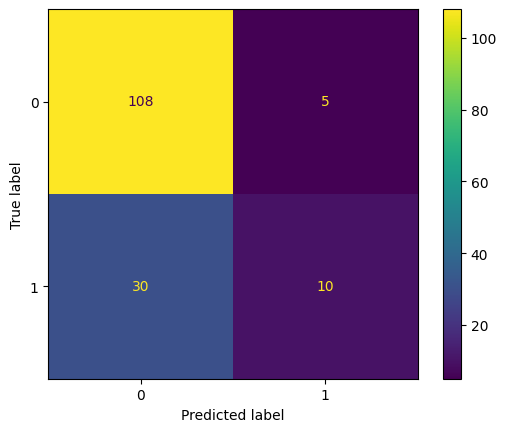

In [174]:
matrix = ConfusionMatrixDisplay.from_predictions(y, rf.predict(x))
plt.show()

In [33]:
fpr_rf, tpr_rf, thr_rf = roc_curve(y, y_rf)

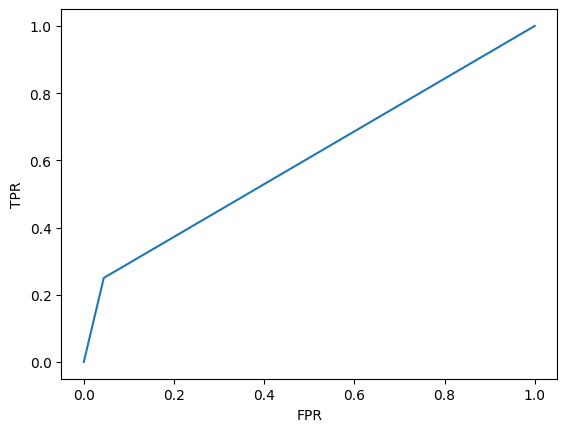

In [34]:
plt.plot(fpr_rf, tpr_rf, linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('RF.jpg')

In [35]:
auc_rf = auc(fpr_rf, tpr_rf)
auc_rf

0.6028761061946903

In [36]:
lr.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_lr=lr.predict(x)

In [125]:
print(classification_report(y, y_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       113
           1       0.28      0.12      0.17        40

    accuracy                           0.69       153
   macro avg       0.51      0.50      0.49       153
weighted avg       0.62      0.69      0.64       153



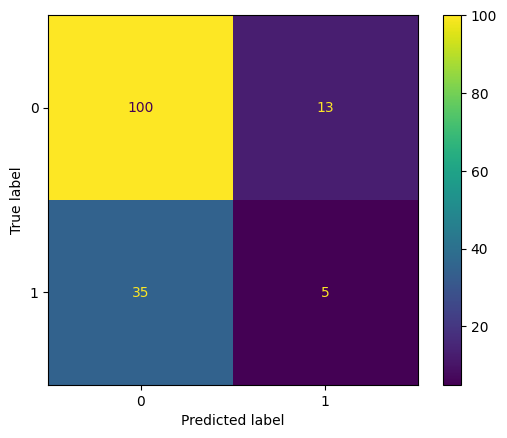

In [173]:
matrix = ConfusionMatrixDisplay.from_predictions(y, lr.predict(x))
plt.show()

In [38]:
fpr_lr, tpr_lr, thr_lr = roc_curve(y, y_lr)

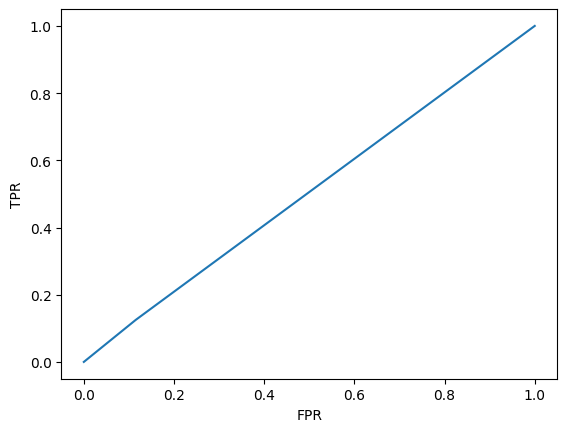

In [39]:
plt.plot(fpr_lr, tpr_lr, linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('LR.jpg')

In [40]:
auc_lr = auc(fpr_lr, tpr_lr)
auc_lr

0.5049778761061947

In [41]:
svc.fit(X,Y)

SVC(C=1, gamma=0.001)

In [42]:
y_svc=svc.predict(x)

In [132]:
print(classification_report(y, y_svc))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       113
           1       0.60      0.07      0.13        40

    accuracy                           0.75       153
   macro avg       0.68      0.53      0.49       153
weighted avg       0.71      0.75      0.66       153



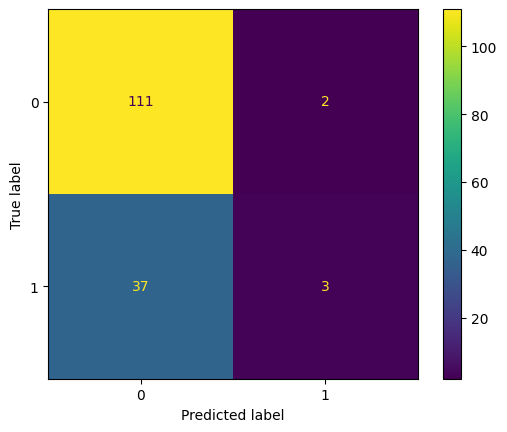

In [172]:
matrix = ConfusionMatrixDisplay.from_predictions(y, svc.predict(x))
plt.show()

In [43]:
fpr_svc, tpr_svc, thr_svc = roc_curve(y, y_svc)

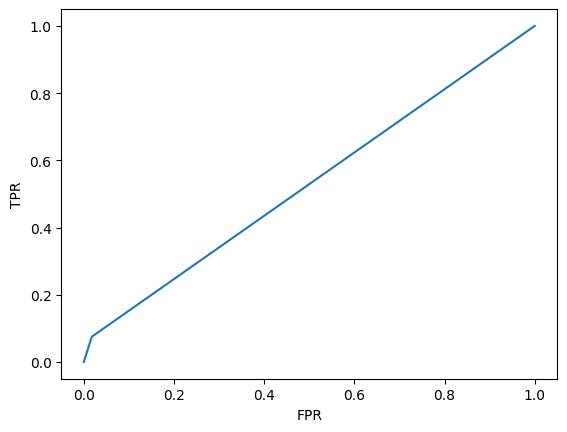

In [44]:
plt.plot(fpr_svc, tpr_svc, linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('SVC.jpg')

In [45]:
auc_svc = auc(fpr_svc, tpr_svc)
auc_svc

0.5286504424778761

In [46]:
ann.fit(X,Y)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate='adaptive',
              random_state=0, solver='sgd')

In [47]:
y_ann = ann.predict(x)

In [139]:
print(classification_report(y, y_ann))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       113
           1       0.00      0.00      0.00        40

    accuracy                           0.74       153
   macro avg       0.37      0.50      0.42       153
weighted avg       0.55      0.74      0.63       153



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


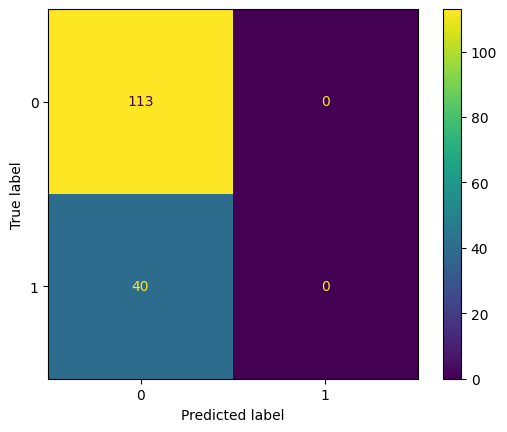

In [171]:
matrix = ConfusionMatrixDisplay.from_predictions(y, ann.predict(x))
plt.show()

In [48]:
fpr_ann, tpr_ann, thr_ann = roc_curve(y, y_ann)

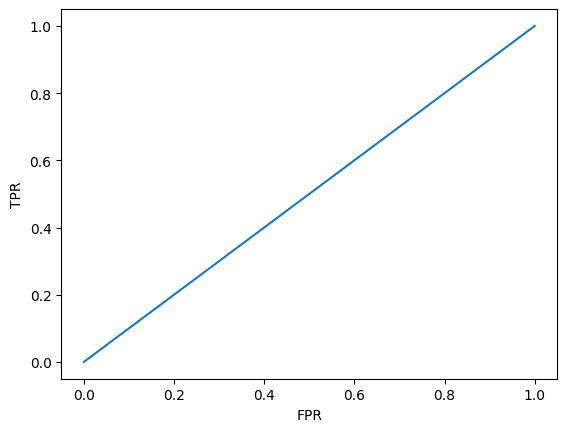

In [49]:
plt.plot(fpr_ann, tpr_ann, linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('ANN.jpg')

In [50]:
auc_ann = auc(fpr_ann, tpr_ann)
auc_ann

0.5

In [51]:
dtc.fit(X,Y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=0)

In [52]:
y_dtc = dtc.predict(x)

In [146]:
print(classification_report(y, y_dtc))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       113
           1       0.58      0.17      0.27        40

    accuracy                           0.75       153
   macro avg       0.67      0.57      0.56       153
weighted avg       0.72      0.75      0.70       153



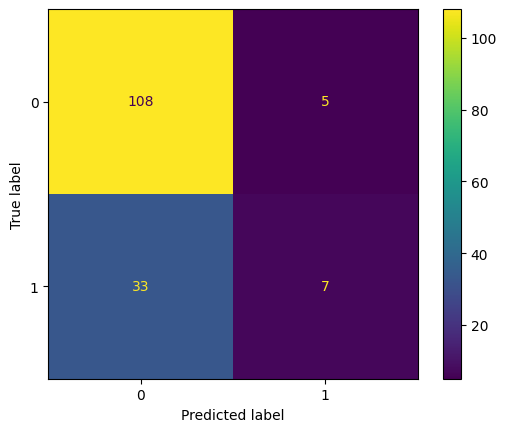

In [170]:
matrix = ConfusionMatrixDisplay.from_predictions(y, dtc.predict(x))
plt.show()

In [53]:
fpr_dtc, tpr_dtc, thr_dtc = roc_curve(y, y_dtc)

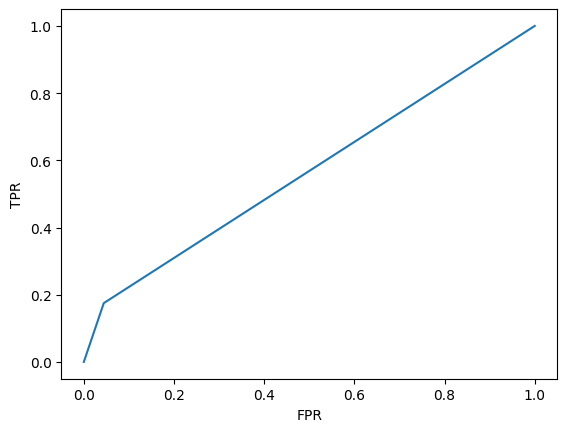

In [54]:
plt.plot(fpr_dtc, tpr_dtc, linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('DTC.jpg')

In [55]:
auc_dtc = auc(fpr_dtc, tpr_dtc)
auc_dtc

0.5653761061946903

In [56]:
gbc.fit(X,Y)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500,
                           random_state=0)

In [57]:
y_gbc = gbc.predict(x)

In [153]:
print(classification_report(y, y_gbc))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       113
           1       0.62      0.12      0.21        40

    accuracy                           0.75       153
   macro avg       0.69      0.55      0.53       153
weighted avg       0.72      0.75      0.68       153



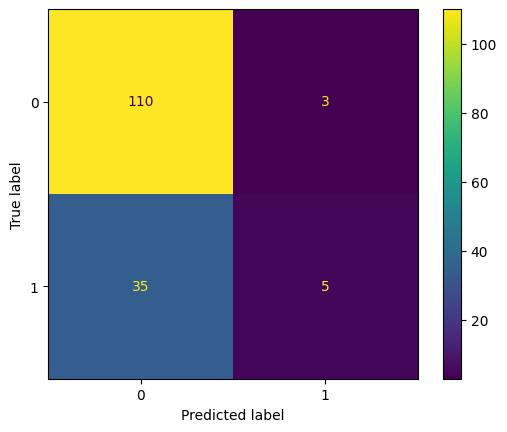

In [169]:
matrix = ConfusionMatrixDisplay.from_predictions(y, gbc.predict(x))
plt.show()

In [58]:
fpr_gbc, tpr_gbc, thr_gbc = roc_curve(y, y_gbc)

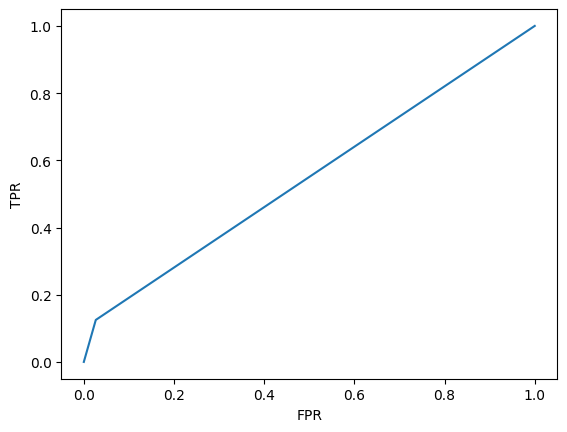

In [59]:
plt.plot(fpr_gbc, tpr_gbc, linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('GBC.jpg')

In [60]:
auc_gbc = auc(fpr_gbc, tpr_gbc)
auc_gbc

0.5492256637168141

In [160]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.6 MB/s eta 0:00:00


In [161]:
import shap

In [162]:
shap_values = shap.TreeExplainer(rf).shap_values(x)

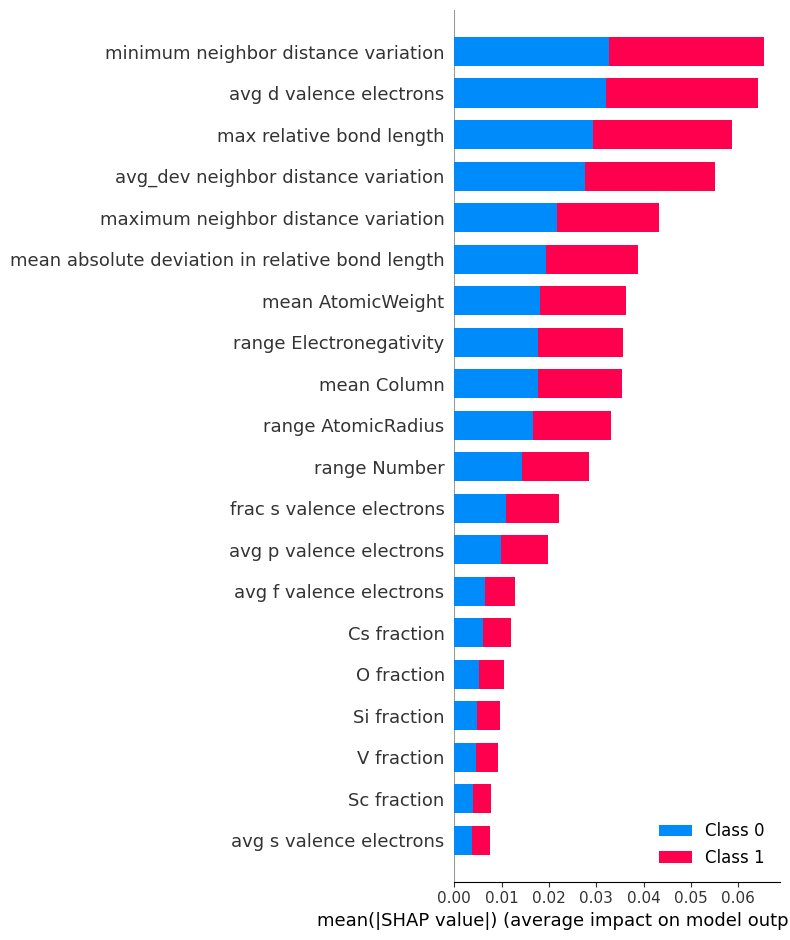

In [164]:
shap.summary_plot(shap_values, x, plot_type='bar')

In [165]:
pv = pd.DataFrame(y_rf, columns=['predicted value'])

In [166]:
pv

,predicted value
0,0
1,0
2,0
3,1
4,0
...,...
148,0
149,0
150,0
151,1


In [61]:
data = {'Algorithm': ['Random Forest', 'Logistic Regression', 'Support Vector Classification', 'Artificial Neural Network (ANN)', 'Decision Tree','Gradient Boosting Classification'] ,
    'Avarge accuracy':[auc_rf, auc_lr, auc_svc, auc_ann,auc_dtc,auc_gbc]}
d = pd.DataFrame(data)
# display the results in a table
display(d)

,Algorithm,Avarge accuracy
0,Random Forest,0.602876
1,Logistic Regression,0.504978
2,Support Vector Classification,0.528650
3,Artificial Neural Network (ANN),0.500000
4,Decision Tree,0.565376
5,Gradient Boosting Classification,0.549226
